In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils.np_utils import to_categorical 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools

X test : (1002, 128, 128, 3)
y test : (1002,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


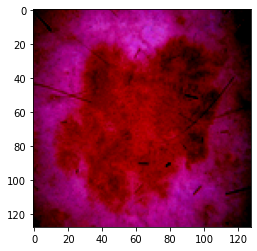

In [4]:
X_test = np.load("128_128_test.npy")
y_test = np.load("test_labels.npy")

print(f'X test : {X_test.shape}')
print(f'y test : {y_test.shape}')

y_test = to_categorical(y_test)

X_mean = np.mean(X_test)
X_std = np.std(X_test)
X_test = (X_test - X_mean)/X_std
plt.imshow(X_test[3])
plt.show()

#### CNN

In [5]:
model_cnn = keras.models.load_model('model_cnn.h5')
history_cnn = pd.read_csv('history_cnn.csv').drop(['Unnamed: 0'], axis = 1)

In [9]:
# model_cnn.summary()

In [6]:
history_cnn_ = history_cnn.sort_values(by=['accuracy'], ascending=False)
history_cnn_.head(10)

,loss,accuracy,val_loss,val_accuracy,lr
29,0.5613,0.7891,0.6142,0.7650,3.1250e
26,0.5639,0.7889,0.6149,0.7661,6.2500e
28,0.5694,0.7886,0.6170,0.7616,3.1250e
25,0.5718,0.7878,0.6206,0.7661,6.2500e
27,0.5694,0.7841,0.6169,0.7672,6.2500e
22,0.5800,0.7815,0.6212,0.7650,1.2500e
23,0.5790,0.7798,0.6193,0.7594,1.2500e
24,0.5747,0.7797,0.6291,0.7639,1.2500e
18,0.6002,0.7786,0.6265,0.7694,2.5000e
21,0.5896,0.7783,0.6414,0.7650,2.5000e


In [7]:
loss_test, acc_test = model_cnn.evaluate(X_test, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (acc_test, loss_test))

32/32 [==============================] - 3s 80ms/step - loss: 0.6466 - accuracy: 0.7555
Test: accuracy = 0.755489  ;  loss = 0.646576


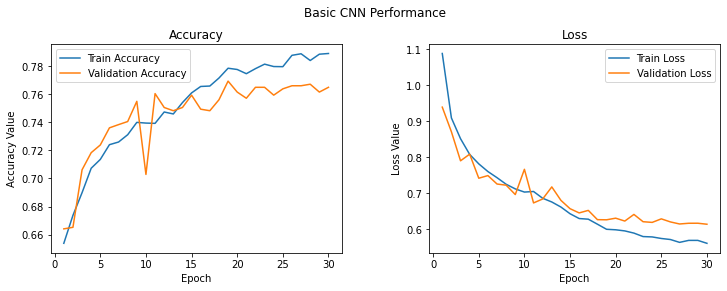

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history_cnn['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_cnn['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_cnn['loss'], label='Train Loss')
ax2.plot(epoch_list, history_cnn['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [9]:
Y_pred = model_cnn.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1)     

32/32 [==============================] - 3s 87ms/step


In [10]:
print(classification_report(y_test, np.around(Y_pred, decimals=0)))

              precision    recall  f1-score   support

           0       0.50      0.11      0.18        28
           1       0.69      0.42      0.52        57
           2       0.55      0.38      0.45       108
           3       0.00      0.00      0.00        15
           4       0.88      0.88      0.88       678
           5       0.91      0.71      0.80        14
           6       0.54      0.34      0.42       102

   micro avg       0.82      0.71      0.76      1002
   macro avg       0.58      0.41      0.46      1002
weighted avg       0.78      0.71      0.73      1002
 samples avg       0.71      0.71      0.71      1002



C:\Users\muham\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muham\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(10,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


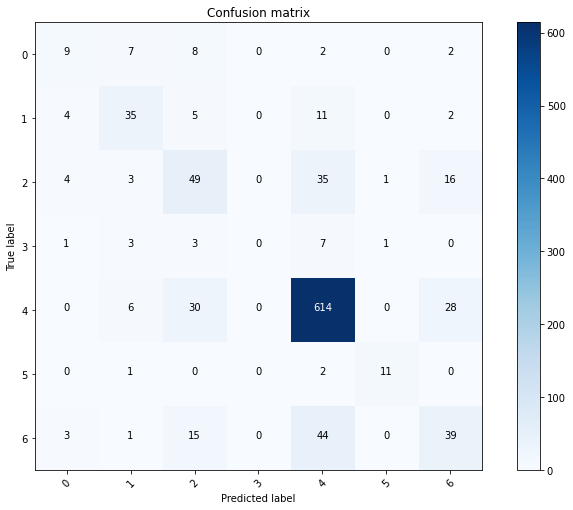

In [12]:
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(7)) 

### VGG16

In [13]:
model_vgg16 = keras.models.load_model('model_vgg16.h5')
history_vgg16 = pd.read_csv('history_vgg16.csv').drop(['Unnamed: 0'], axis = 1)

In [14]:
history_vgg16_ = history_vgg16.sort_values(by=['accuracy'], ascending=False)
history_vgg16_.head(10)

,loss,accuracy,val_loss,val_accuracy,lr
19,0.3622,0.8698,0.6061,0.7835,1.0000e
18,0.3656,0.8660,0.5770,0.7768,1.0000e
17,0.3919,0.8563,0.6369,0.7835,1.0000e
15,0.4205,0.8460,0.6402,0.7634,1.0000e
16,0.4164,0.8440,0.6593,0.7924,1.0000e
14,0.4443,0.8352,0.6270,0.7790,1.0000e
13,0.4709,0.8301,0.5469,0.7812,1.0000e
12,0.4794,0.8232,0.6449,0.7679,1.0000e
11,0.5018,0.8171,0.6150,0.7790,1.0000e
10,0.4986,0.8168,0.6287,0.7790,1.0000e


In [15]:
loss_test, acc_test = model_vgg16.evaluate(X_test, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (acc_test, loss_test))

32/32 [==============================] - 61s 2s/step - loss: 2.6601 - acc: 0.6557
Test: accuracy = 0.655689  ;  loss = 2.660074


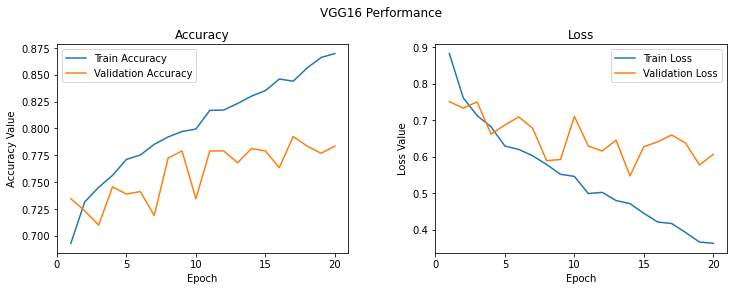

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('VGG16 Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,len(history_vgg16)+1))
ax1.plot(epoch_list, history_vgg16['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_vgg16['val_accuracy'], label='Validation Accuracy')

ax1.set_xticks(np.arange(0, len(history_vgg16)+1, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_vgg16['loss'], label='Train Loss')
ax2.plot(epoch_list, history_vgg16['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, len(history_vgg16)+1, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [17]:
Y_pred = model_vgg16.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1)     

32/32 [==============================] - 56s 2s/step


In [18]:
print(classification_report(y_test, np.around(Y_pred, decimals=0)))

              precision    recall  f1-score   support

           0       0.08      0.07      0.08        28
           1       0.42      0.68      0.52        57
           2       0.44      0.10      0.17       108
           3       0.00      0.00      0.00        15
           4       0.90      0.77      0.83       678
           5       0.41      0.86      0.56        14
           6       0.27      0.61      0.37       102

   micro avg       0.66      0.65      0.65      1002
   macro avg       0.36      0.44      0.36      1002
weighted avg       0.71      0.65      0.66      1002
 samples avg       0.65      0.65      0.65      1002



C:\Users\muham\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muham\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


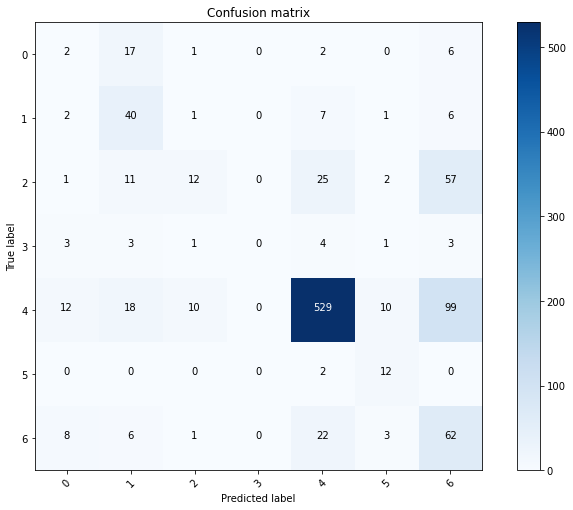

In [19]:
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(7)) 

### DenseNet

In [20]:
model_densenet = keras.models.load_model('model_densenet.h5')
history_densenet = pd.read_csv('history_densenet.csv').drop(['Unnamed: 0'], axis = 1)

In [21]:
history_densenet_ = history_densenet.sort_values(by=['accuracy'], ascending=False)
history_densenet_.head(10)

,loss,accuracy,val_loss,val_accuracy,lr
19,0.1422,0.9494,0.6285,0.8449,1.0000e
18,0.1490,0.9444,0.6759,0.8359,1.0000e
16,0.1739,0.9380,0.5847,0.8382,1.0000e
17,0.1714,0.9349,0.5612,0.8460,1.0000e
15,0.1862,0.9324,0.5539,0.8482,1.0000e
14,0.2079,0.9218,0.5629,0.8203,1.0000e
13,0.2224,0.9166,0.5911,0.8281,1.0000e
12,0.2417,0.9108,0.5394,0.8304,1.0000e
11,0.2545,0.9052,0.5183,0.8214,1.0000e
10,0.2789,0.8973,0.5379,0.8237,1.0000e


In [26]:
# model_densenet.summary

In [22]:
loss_test, acc_test = model_densenet.evaluate(X_test, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (acc_test, loss_test))

32/32 [==============================] - 129s 4s/step - loss: 3.2214 - acc: 0.5210
Test: accuracy = 0.520958  ;  loss = 3.221390


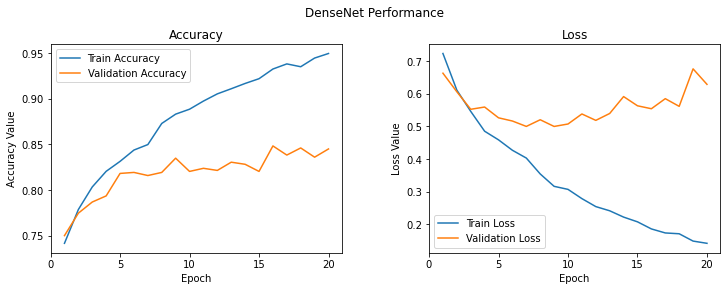

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('DenseNet Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,len(history_densenet)+1))
ax1.plot(epoch_list, history_densenet['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_densenet['val_accuracy'], label='Validation Accuracy')

ax1.set_xticks(np.arange(0, len(history_densenet)+1, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_densenet['loss'], label='Train Loss')
ax2.plot(epoch_list, history_densenet['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, len(history_densenet)+1, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [24]:
Y_pred = model_densenet.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1)     

32/32 [==============================] - 137s 4s/step


In [25]:
print(classification_report(yy_test, np.around(Y_pred, decimals=0)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.58      0.19      0.29        57
           2       0.36      0.05      0.08       108
           3       0.00      0.00      0.00        15
           4       0.88      0.61      0.72       678
           5       0.27      0.57      0.36        14
           6       0.18      0.78      0.29       102

   micro avg       0.52      0.51      0.52      1002
   macro avg       0.32      0.31      0.25      1002
weighted avg       0.69      0.51      0.55      1002
 samples avg       0.51      0.51      0.51      1002



C:\Users\muham\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muham\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


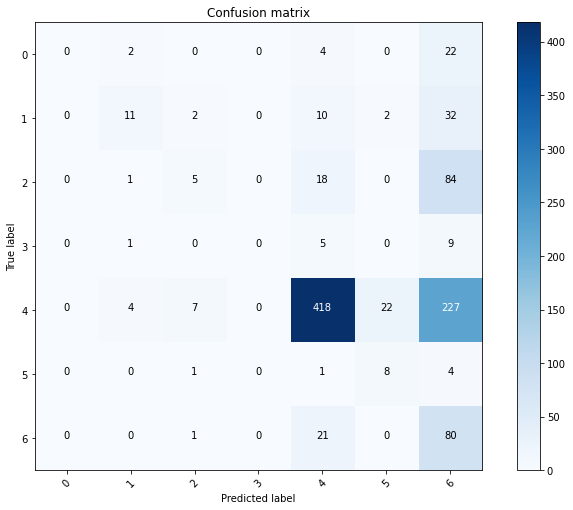

In [26]:
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(7)) 

### Inception3

In [27]:
model_inception = keras.models.load_model('model_inceptionV3.h5')
history_inception = pd.read_csv('history_inception3.csv').drop(['Unnamed: 0'], axis = 1)

In [28]:
history_inception_ = history_inception.sort_values(by=['accuracy'], ascending=False)
history_inception_.head(10)

,loss,accuracy,val_loss,val_accuracy,lr
18,0.5634,0.7974,0.6630,0.7612,2.5000e
17,0.5716,0.7941,0.6549,0.7902,2.5000e
19,0.5599,0.7930,0.7685,0.7478,2.5000e
15,0.5780,0.7915,0.7196,0.7455,2.5000e
16,0.5802,0.7877,0.7070,0.7522,2.5000e
14,0.5927,0.7863,0.7182,0.7500,5.0000e
12,0.6009,0.7855,0.7141,0.7634,5.0000e
13,0.5927,0.7795,0.6917,0.7567,5.0000e
11,0.6184,0.7766,0.7276,0.7321,5.0000e
9,0.6414,0.7716,0.7524,0.7277,1.0000e


In [29]:
loss_test, acc_test = model_inception.evaluate(X_test, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (acc_test, loss_test))

32/32 [==============================] - 19s 512ms/step - loss: 2.4140 - acc: 0.3992
Test: accuracy = 0.399202  ;  loss = 2.414046


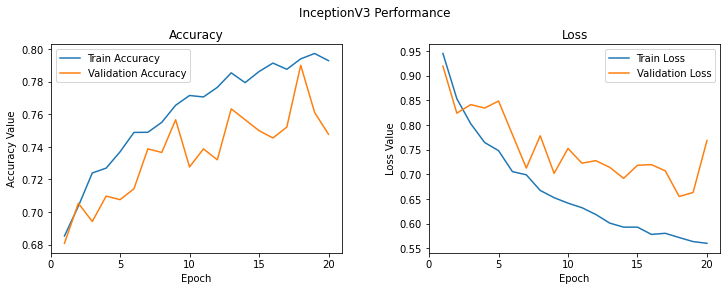

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('InceptionV3 Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,len(history_inception)+1))
ax1.plot(epoch_list, history_inception['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history_inception['val_accuracy'], label='Validation Accuracy')

ax1.set_xticks(np.arange(0, len(history_inception)+1, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history_inception['loss'], label='Train Loss')
ax2.plot(epoch_list, history_inception['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, len(history_inception)+1, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [31]:
Y_pred = model_inception.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1)     

32/32 [==============================] - 18s 446ms/step


In [32]:
print(classification_report(y_test, np.around(Y_pred, decimals=0)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.04      0.02      0.02        57
           2       0.20      0.15      0.17       108
           3       0.00      0.00      0.00        15
           4       0.65      0.45      0.53       678
           5       0.02      0.36      0.05        14
           6       0.19      0.08      0.11       102

   micro avg       0.41      0.33      0.37      1002
   macro avg       0.16      0.15      0.13      1002
weighted avg       0.48      0.33      0.39      1002
 samples avg       0.33      0.33      0.33      1002



C:\Users\muham\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\muham\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


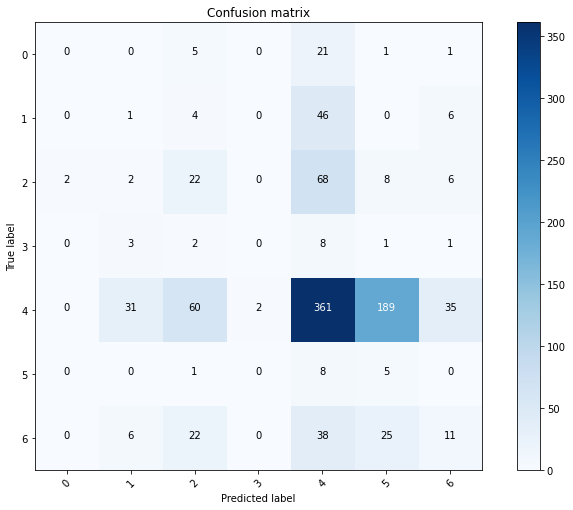

In [33]:
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(7)) 